In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc

class Csv_to_graph:
    
    
    
    def __init__(self, csv): # csv파일을 df로 불러오기
        self.group = pd.read_csv(csv, chunksize = 1000, encoding = 'cp949')
        self.group = list(self.group)
        self.df = pd.concat(self.group)
        
    def extract_necessary(self, necessary_cols): #필요한 컬럼을 리스트로 받아서 추출한 뒤 df_necessary로 불러오기
        self.df_necessary = self.df.loc[:, necessary_cols]
#         self.df_necessary = self.df.loc[:,['사업장명', '인허가일자', '인허가취소일자','휴업시작일자', '휴업종료일자', '폐업일자', '영업상태명', '소재지전체주소', '도로명전체주소']]

    def get_df_necessary(self):
        return self.df_necessary
        
    def add_necessary_cols(self): #필요한 컬럼('주소') 생성하기
        self.df_necessary.loc[:,'주소'] = np.where(self.df_necessary.loc[:,'도로명전체주소'].notnull() , self.df_necessary['도로명전체주소'], self.df_necessary['소재지전체주소'])
        self.df_necessary.loc[:,'폐업,전출,휴업,취소,말소여부'] = np.where(self.df_necessary.loc[:,'인허가취소일자'].notnull() | self.df_necessary.loc[:,'휴업시작일자'].notnull() | self.df_necessary.loc[:,'폐업일자'].notnull(), 1, 0)
        self.df_necessary.loc[:, '폐업,전출,휴업,취소,말소일자'] = self.df_necessary.loc[:, ['인허가취소일자', '폐업일자', '휴업시작일자']].max(axis=1)
    
    def to_datetime(self): #날짜 관련 컬럼들을 datetime 형식으로 바꿔줌
        cols = ['인허가일자', '인허가취소일자', '폐업일자', '휴업시작일자', '휴업종료일자', '폐업,전출,휴업,취소,말소일자']
        for col in cols:
            self.df_necessary[col] = pd.to_datetime(self.df_necessary[col], format='%Y%m%d') 
#         self.df_necessary['인허가일자'] = pd.to_datetime(self.df_necessary['인허가일자'], format='%Y%m%d') 
#         self.df_necessary['인허가취소일자'] = pd.to_datetime(self.df_necessary['인허가취소일자'], format='%Y%m%d') 
#         self.df_necessary['폐업일자'] = pd.to_datetime(self.df_necessary['폐업일자'], format='%Y%m%d') 
#         self.df_necessary['휴업시작일자'] = pd.to_datetime(self.df_necessary['휴업시작일자'], format='%Y%m%d') 
#         self.df_necessary['휴업종료일자'] = pd.to_datetime(self.df_necessary['휴업종료일자'], format='%Y%m%d')
#         self.df_necessary['폐업,전출,휴업,취소,말소일자'] = pd.to_datetime(self.df_necessary['폐업,전출,휴업,취소,말소일자'], format='%Y%m%d')
    
    def extract_yyyymm(self):
        self.df_necessary.loc[:,'인허가연월'] = self.df_necessary.loc[:,'인허가일자'].dt.to_period('M')
        self.df_necessary.loc[:,'폐업,전출,휴업,취소,말소연월'] = self.df_necessary.loc[:,'폐업,전출,휴업,취소,말소일자'].dt.to_period('M')
    
    def extract_region(self, region = " "): # region에 아무 것도 입력하지 않으면 전국단위 추출
        self.df_region = self.df_necessary[(self.df_necessary.loc[:,'주소'].str.contains(region, na = False))]
    
    def get_df_region(self):
        return self.df_region
    
    def to_graph(self):
        rc('font', family='AppleGothic')
        plt.title("연도 및 월별 체력단련장업 추이")
        plt.xlabel("월")
        plt.ylabel("업장 수")
        self.df_region.groupby(self.df_region.loc[:,'인허가연월'])['인허가연월'].count().plot()
        self.df_region.groupby(self.df_region.loc[:,'폐업,전출,휴업,취소,말소연월'])['폐업,전출,휴업,취소,말소여부'].sum().plot()
        plt.xlim('1988-01', '2022-10')
        plt.show()


In [90]:
a = Csv_to_graph('fulldata_10_42_01_P_체력단련장업.csv')

In [91]:
a.extract_necessary(['사업장명', '인허가일자', '인허가취소일자','휴업시작일자', '휴업종료일자', '폐업일자', '영업상태명', '소재지전체주소', '도로명전체주소'])

In [92]:
a.add_necessary_cols()

In [93]:
a.to_datetime()

In [94]:
a.extract_yyyymm()

In [110]:
a.extract_region("부산광역시")

In [111]:
a.get_df_region()

,사업장명,인허가일자,인허가취소일자,휴업시작일자,휴업종료일자,폐업일자,영업상태명,소재지전체주소,도로명전체주소,주소,"폐업,전출,휴업,취소,말소여부","폐업,전출,휴업,취소,말소일자",인허가연월,"폐업,전출,휴업,취소,말소연월"
20,금정산온천레포츠,2005-03-25,2021-04-13,NaT,NaT,NaT,취소/말소/만료/정지/중지,부산광역시 금정구 구서동 203-5 금정산온천 4층,"부산광역시 금정구 구서중앙로15번길 20, 금정산온천 4층 (구서동)","부산광역시 금정구 구서중앙로15번길 20, 금정산온천 4층 (구서동)",1,2021-04-13,2005-03,2021-04
27,피트니스 코리아,2020-08-05,NaT,NaT,NaT,2020-09-21,폐업,부산광역시 동구 초량동 207-7,"부산광역시 동구 중앙대로231번길 16, 3층 (초량동)","부산광역시 동구 중앙대로231번길 16, 3층 (초량동)",1,2020-09-21,2020-08,2020-09
329,매드맥스짐,2018-12-04,NaT,NaT,NaT,NaT,영업/정상,부산광역시 연제구 연산동 739-3번지 행복한메디컬센타,"부산광역시 연제구 월드컵대로 128, 행복한메디컬센타 지하층 (연산동)","부산광역시 연제구 월드컵대로 128, 행복한메디컬센타 지하층 (연산동)",0,NaT,2018-12,NaT
336,베스트피트니스2,2018-11-19,NaT,NaT,NaT,NaT,영업/정상,부산광역시 해운대구 우동 1432번지 현대베네시티아파트,"부산광역시 해운대구 해운대해변로 163, B101호 (우동, 현대베네시티아파트)","부산광역시 해운대구 해운대해변로 163, B101호 (우동, 현대베네시티아파트)",0,NaT,2018-11,NaT
360,(주)올집웰리빙서비스 올짐휘트니스 시청지점,2019-01-11,NaT,NaT,NaT,NaT,영업/정상,부산광역시 연제구 연산동 822-6 시청스마트더블유아파트,"부산광역시 연제구 연수로 103, 지하1층 101호 (연산동, 시청스마트더블유아파트)","부산광역시 연제구 연수로 103, 지하1층 101호 (연산동, 시청스마트더블유아파트)",0,NaT,2019-01,NaT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20690,호랑이선생님,2020-12-11,NaT,NaT,NaT,2022-06-30,폐업,부산광역시 연제구 거제동 1462-33,"부산광역시 연제구 거제천로269번길 44, 지하 1층 (거제동)","부산광역시 연제구 거제천로269번길 44, 지하 1층 (거제동)",1,2022-06-30,2020-12,2022-06
20694,웰키랩,2021-02-03,NaT,NaT,NaT,2022-10-28,폐업,부산광역시 해운대구 우동 601-15,"부산광역시 해운대구 중동1로 11-1, 지하층 (우동)","부산광역시 해운대구 중동1로 11-1, 지하층 (우동)",1,2022-10-28,2021-02,2022-10
20719,박중흥휘트니스스쿨(JHPgym),2009-07-21,NaT,2022-06-27,2022-12-31,NaT,휴업,부산광역시 부산진구 부암동 52-8 3층,부산광역시 부산진구 시민공원로19번길 53-9 (부암동),부산광역시 부산진구 시민공원로19번길 53-9 (부암동),1,2022-06-27,2009-07,2022-06
20721,화신체력관,1997-04-22,NaT,2003-01-08,2003-12-31,NaT,휴업,부산광역시 사하구 괴정동 378-295번지,부산광역시 사하구 사리로 4 (괴정동),부산광역시 사하구 사리로 4 (괴정동),1,2003-01-08,1997-04,2003-01


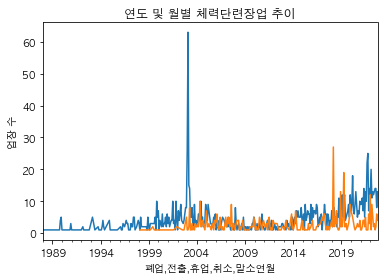

In [112]:
a.to_graph()